# Improving the model

### Introduction

In the previous section, we discussed our basketball player who models the relationship between shot angle and distance.

<img src="basketball-shooting.jpg">

We expressed this model as a mathematical formula:  

$$ distance = 25 * angle $$

And we plotted our graph model as well as it's errors like so.

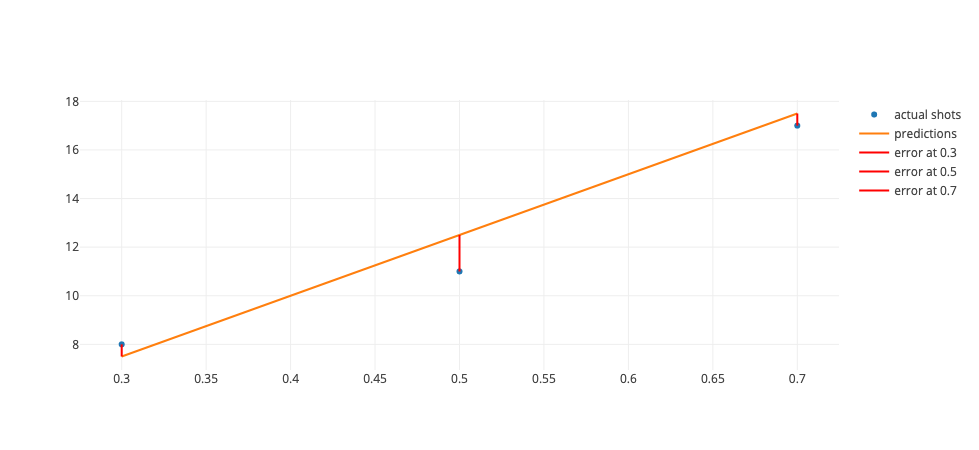

In [2]:
from data import updated_model_with_errors
updated_model_with_errors(25)

We want to describe the performance of the model as a whole, so we first tried adding up each of the errors to calculate the total error.  However, because positive and negative errors cancel each other out, we fixed this by first squaring each of the errors and then calculating the *sum of the squared errors* (SSE).

You can see this below.

| angle        | actual distance | expected distance | squared error           
| ------------- |:-------------:| :-------------:| :-------------:| 
|    .30        | 8 feet | 7.5 feet | $.25 $ | 
|    .50        | 11 feet | 12.5 feet | $ 2.25 $| 
|    .70        | 17  feet | 17.5 feet | $.25$ | 

What's makes this useful is that now we can can now use our squared error metric to different models.  For example, above is the SSE for the model $distance = 25 * angle$ and we could compare this with the squared error for a different model.

$$ distance = 40 * angle $$

| angle        | actual distance | expected distance | squared error           
| ------------- |:-------------:| :-------------:| :-------------:| 
|    .30        | 8 feet | 12 feet | $8 - 12 = 16$ | 
|    .50        | 11 feet | 20 feet | $11 - 20 = 81$ | 
|    .70        | 17 feet | 28 feet | $17 - 28 = 121$ | 

And we simply choose the model with the lower error.

## Defining our loss function

This metric of sum of squared errors is an example of a loss function.  

**Loss Function**

> A **loss function** is a positive number sums an error metric (here squared differences).  

The canonical machine learning problem 

> The **canonical machine learning problem** is to produce a hypothesis function such that it minimizes our loss function.

Ok, let's try do solve the canonical machine learning problem with our problem here.

## Finding the best fit line

Now above, we saw we see which model better predicts our shot distance by plugging in different angles for our shot distance, and then calculate the respective SSE.  

But really, what we would like to do is to find the *best* line.  How should we do that?  Should we just trying a bunch of different numbers to multiply angle by, and then calculating the RSS?  Well, kinda, yea.

Let's start by trying two different numbers 15, and then 20.

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



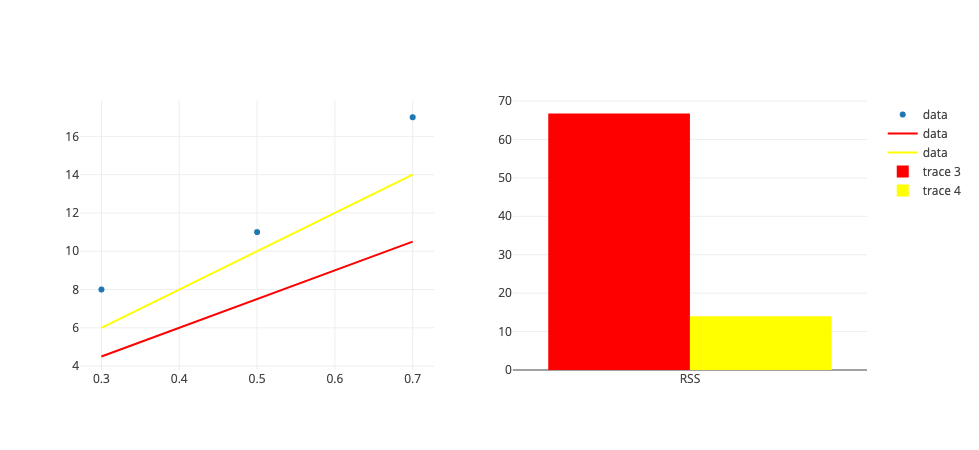

In [21]:
from graph import model_trace, trace_rss, pair_colors, plot_side_by_side
from graph import trace_values


m_values = list(range(15, 25, 5))
rss_traces = []
model_traces = []

actual_trace = trace_values(x_values = observed_shot_angles, y_values = observed_distances)

for m in m_values:
    rss_trace = trace_rss(m, b, observed_shot_angles, observed_distances)
    rss_traces.append(rss_trace)
    built_model_trace = model_trace(m, b, observed_shot_angles, observed_distances)
    model_traces.append(built_model_trace)
    
pair_colors(model_traces, rss_traces)
plot_side_by_side([actual_trace] + model_traces, rss_traces)

You'll see two colors, red and yellow. 
* The model $ distance=15∗angle $ is the red line and the related RSS (another name for SSE) is over to the right in red of 66.75.  
* The model $ distance=20∗angle$ is the yellow line and it's related RSS is in yellow with an RSS of 15.

So we just tried models of $distance = 15*angle*$ and $distance = 20*angle$. 

Now let's try three more.

We'll add in $distance = 25*angle$ and $distance = 30*angle$ and $distance = 35*angle$.

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



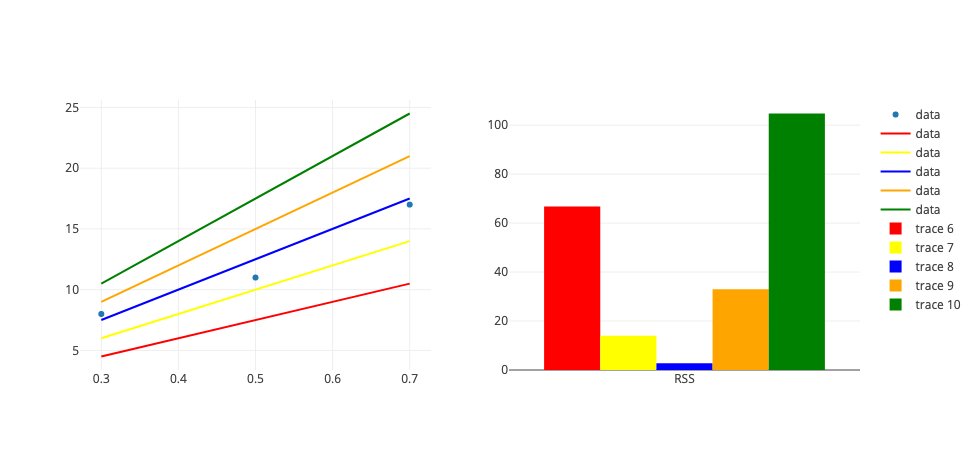

In [23]:
from graph import model_trace, trace_rss, pair_colors, plot_side_by_side
from graph import trace_values


m_values = list(range(15, 40, 5))
rss_traces = []
model_traces = []

actual_trace = trace_values(x_values = observed_shot_angles, y_values = observed_distances)

for m in m_values:
    rss_trace = trace_rss(m, b, observed_shot_angles, observed_distances)
    rss_traces.append(rss_trace)
    built_model_trace = model_trace(m, b, observed_shot_angles, observed_distances)
    model_traces.append(built_model_trace)
    
pair_colors(model_traces, rss_traces)
plot_side_by_side([actual_trace] + model_traces, rss_traces)

So now the blue orange and green colors are associated with multipliers of 25, 30, and 35.  Do you really think 

## The point of it all

Now it may be pretty obvious that our green line doesn't do a great job of matching our data, but remember, our algorithm can't just eyeball it like we can when choosing the best fit line.  But the RSS chart to the right associates each model with a different number.  Our algorithm can use these RSS numbers.

Now we can also see a pattern in our RSS chart to the right.  In calculating the RSS with five sequential numbers, able to see that our curves downward on either side toward a lowpoint.  So this means that in trying to find the model that produces the lowest RSS, we do not have to try every single number.  Instead we can try different numbers and if gets lower like it does when we move from $distance=15∗angle $ to $ distance=20∗angle $ we keep increasing this number.  

And if the RSS is instead increases like it does from $ distance=30∗angle $ to $ distance=35∗angle $ we decrease our number.

This process of optimizing our model based on how its score against an error metric (here RSS) is called *training* our model.  This is how the machine *learns* what model to choose. 

### Summary

In this lesson, we saw how machine learning models can improve to find an optimal model.  One mechanisms for machine learning problems to do this is by trying different parameters and using the cost function to collect feedback on the model's performance.  A machine learning algorithm's loss function can give us feedback on our hypothesis functionso that it can improve step by step, as we saw above.  This process of changing the parameters so to find a machine learning model that minimizes a cost function is called training the model. 